### САМОСТОЯТЕЛЬНАЯ РАБОТА №2-1 (двумерный случай)
### Оценка корреляции

In [1]:
import numpy as np
import statistics
import matplotlib.pyplot as plt
import math
from numpy import random, std
from random import normalvariate
from scipy import stats
from scipy.stats import norm, pearsonr
from scipy.integrate import quad
from statistics import mean

In [2]:
a = 4
b = 11
a, b

(4, 11)

## №1.

Мат. ожидание и среднеквадратичное отклонение.

In [3]:
mu = a + b
sigma = abs(a - b)
mu, sigma

(15, 7)

60 случайных чисел, значения которых являются значениями равномерно распределенной случайной величины на отрезке от 0 до 1. 

In [4]:
size = 60
sample_1 = np.random.random_sample(size = size)
sample_1

array([0.95405095, 0.61017629, 0.88046081, 0.22743415, 0.55495145,
       0.11978074, 0.76544557, 0.44192824, 0.79775454, 0.76192567,
       0.69801484, 0.91255103, 0.27827817, 0.87887892, 0.98722009,
       0.75715916, 0.96264718, 0.22792274, 0.53903721, 0.20470037,
       0.59184506, 0.78716938, 0.32575481, 0.3368433 , 0.55823622,
       0.59415091, 0.46176005, 0.02464047, 0.96366629, 0.43608181,
       0.00257444, 0.74936466, 0.16553179, 0.12973548, 0.65343216,
       0.95455105, 0.92632818, 0.00757875, 0.9572655 , 0.90675726,
       0.97536642, 0.8921935 , 0.00707952, 0.97845046, 0.19216997,
       0.82065426, 0.65225545, 0.54378642, 0.79207448, 0.5953763 ,
       0.26847085, 0.1255282 , 0.87062657, 0.69551919, 0.47822384,
       0.48631933, 0.47979949, 0.97969928, 0.84498683, 0.46565082])

<BarContainer object of 60 artists>

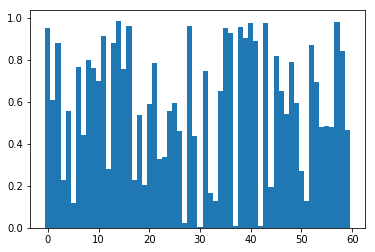

In [5]:
plt.bar([i for i in range(0, len(sample_1))], sample_1, 1)

Выборка, состоящая из значений нормально распределенной случайной величины, полученная с помощью функции, возвращающей обратное значение нормальной функции распределения при заданных значениях вероятности, математического ожидания и стандартного отклонения. 

In [6]:
sample_2 = [norm.ppf(i, loc = mu, scale = sigma) for i in sample_1]
sample_2

[26.798283619219227,
 16.958449831746453,
 23.241054630370215,
 9.768735424297887,
 15.967269383482229,
 6.767414975240326,
 20.067508340184947,
 13.977424441804718,
 20.835392525311754,
 19.987574168869948,
 18.630896492575737,
 24.496429141219906,
 10.884250729890587,
 23.18580601288476,
 30.62984680813643,
 19.880354879605374,
 27.475871269729154,
 9.780063132865378,
 15.686059135500118,
 9.225359321454548,
 16.626056084066995,
 20.576466796327033,
 11.838337990880197,
 12.05234346141923,
 16.025492295773827,
 16.667650868019045,
 14.327995827969575,
 1.2369290250671963,
 27.56439705126715,
 13.873624107320786,
 -4.582985536362365,
 19.707442372069725,
 8.196183227838358,
 7.106503056106641,
 17.762223162365686,
 26.834761501857027,
 25.142848260530634,
 -2.000158019240043,
 27.03859230664655,
 24.24733338048896,
 28.763906558619375,
 23.667945800015247,
 -2.172422323606142,
 29.15924018943287,
 8.910506342839035,
 21.425029291447746,
 17.73991825743645,
 15.769843087008491,
 20.695

<BarContainer object of 60 artists>

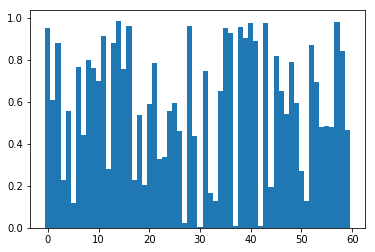

In [10]:
plt.bar([i for i in range(0, len(sample_1))], sample_1, 1)

<BarContainer object of 60 artists>

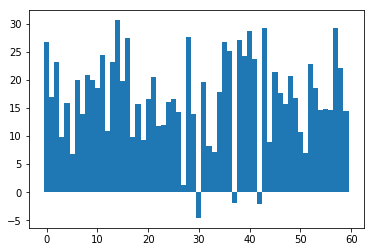

In [7]:
plt.bar([i for i in range(0, len(sample_2))], sample_2, 1)

## №2.

Еще одна выборка из 60 нормально распределенных значений с мат. ожиданием mu и среднеквадратичным отклонением sigma.

In [11]:
sample_3 = random.normal(mu, sigma, size = size)
sample_3

array([26.86151527, 18.13322058,  6.0540483 , 18.3266954 ,  9.75769295,
       23.73746066,  5.39651832, 18.33441568,  7.90447203, 12.72679027,
        8.46270833, 16.18277289, 22.06291886, 33.45918791, 16.92199346,
        6.61727484, 20.20298632,  3.65682715, 14.99843126,  9.7400678 ,
       19.66677881, 16.50002871,  8.15843469, 10.50576576, 15.72838275,
       28.08881611,  6.07536332, 15.44511016, 20.88540931, 16.19774598,
       20.12299068,  9.75630511, 10.40729392, 14.25759534, 18.35494436,
        4.17347862, 18.98990575, 13.58821893, 24.74018644, 12.6162408 ,
        2.23833154, 17.87722641, 17.7845711 , 14.32734306, 14.07863056,
        6.39524428, 20.16110334, 21.33064559, 18.53046245, 28.45497595,
       -2.10331847,  4.11473458, 23.71246645, 16.81915569,  1.05632034,
        6.62668788, 12.06531432, 13.09766614, 19.63231338, 19.87871269])

<BarContainer object of 60 artists>

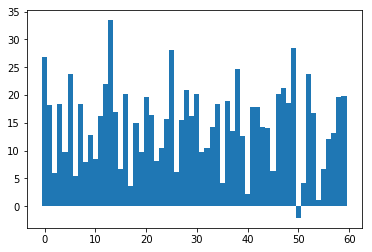

In [12]:
plt.bar([i for i in range(0, len(sample_3))], sample_3, 1)

## №3.

Выборочные коэффициенты корреляции (Пирсона) для всех трех пар из полученных выборок: (1, 2), (1, 3), (2, 3). 

In [13]:
pearson_1_2 = pearsonr(sample_1, sample_2)[0]
pearson_1_2

0.9755683296631769

In [14]:
pearson_1_3 = pearsonr(sample_1, sample_3)[0]
pearson_1_3

0.13291366842110058

In [15]:
pearson_2_3 = pearsonr(sample_2, sample_3)[0]
pearson_2_3

0.08978497831568982

## №4.

Несмещённые оценки ковариации для трёх пар выборок (1, 2), (1, 3), (2, 3).

In [16]:
def _unbiased_covariance_score_(sample_x, sample_y):
    n = len(sample_x)
    x_mean = mean(sample_x)
    y_mean = mean(sample_y)
    summa = 0
    for i in range(n):
        summa += (sample_x[i] - x_mean) * (sample_y[i] - y_mean)
    return summa / (n - 1)  

In [17]:
_unbiased_covariance_score_(sample_1, sample_2)

2.40660265738829

In [18]:
_unbiased_covariance_score_(sample_1, sample_3)

0.300358860104176

In [19]:
_unbiased_covariance_score_(sample_2, sample_3)

5.344991439357892

Коэффициент парной корреляции.

In [20]:
def _pair_correlation_coefficient_(sample_x, sample_y):
    x_mean = mean(sample_x)
    y_mean = mean(sample_y)
    numerator = 0
    for i in range(len(sample_x)):
        numerator += (sample_x[i] - x_mean) * (sample_y[i] - y_mean)
    denominator_x = 0
    denominator_y = 0
    denominator = 1
    for i in range(len(sample_x)):
        denominator_x += ((sample_x[i] - x_mean) ** 2)
        denominator_y += ((sample_y[i] - y_mean) ** 2)
        denominator = (denominator_x * denominator_y) ** (0.5)
    return numerator / denominator

In [21]:
pair_correl_coeff_1_2 = _pair_correlation_coefficient_(sample_1, sample_2)
pair_correl_coeff_1_2

0.9755683296631764

In [22]:
pair_correl_coeff_1_3 = _pair_correlation_coefficient_(sample_1, sample_3)
pair_correl_coeff_1_3

0.13291366842110058

In [23]:
pair_correl_coeff_2_3 = _pair_correlation_coefficient_(sample_2, sample_3)
pair_correl_coeff_2_3

0.08978497831568981

## №5.

Постройте корреляционную матрицу размерности 3 на 3.

In [24]:
def _neg_or_pos_(number):
    if number < 0:
        return '{0:f}'.format(number)
    else:
        return " " + '{0:f}'.format(number)

def _first_row_(name):
    print(name.center(9), "sample_1".center(10), "sample_2".center(10), "sample_3".center(10))

In [25]:
def _pearson_correl_matrix_row_(count, samples):
    print("sample_", end = '')
    print(count, " ", end = '')
    for i in range(3):
        print(_neg_or_pos_(pearsonr(samples[count], samples[i])[0]), " ", end = '')
    print()

def _pearson_correl_matrix_(samples):
    _first_row_("PEARSON")
    for i in range(3):
        _pearson_correl_matrix_row_(i, samples)

In [26]:
_pearson_correl_matrix_([sample_1, sample_2, sample_3])

 PEARSON   sample_1   sample_2   sample_3 
sample_0   1.000000   0.975568   0.132914  
sample_1   0.975568   1.000000   0.089785  
sample_2   0.132914   0.089785   1.000000  


In [27]:
def _pair_correl_matrix_row_(count, samples):
    print("sample_", end = '')
    print(count, " ", end = '')
    for i in range(3):
        print(_neg_or_pos_(_pair_correlation_coefficient_(samples[count], samples[i])), " ", end = '')
    print()

def _pair_correl_matrix_(samples):
    _first_row_("PAIR_CORR")
    for i in range(3):
        _pair_correl_matrix_row_(i, samples)

In [28]:
_pair_correl_matrix_([sample_1, sample_2, sample_3])

PAIR_CORR  sample_1   sample_2   sample_3 
sample_0   1.000000   0.975568   0.132914  
sample_1   0.975568   1.000000   0.089785  
sample_2   0.132914   0.089785   1.000000  
